# Lab 2: Generating random numbers

## Discrete probability distributions

In this lab, we will generate random numbers from a probability distribution. We begin with a discrete probability distribution.

| x |1 |2 |3 |
| --- | --- | --- | --- |
| p| 1/3| 1/3|1/3 |
|||||

The R function *sample()* can be used to generate random numbers from a discrete probability distribution. For example, the following code will randomly pick a number from (1,2,3) without replacement

In [1]:
sample(x=1:3, size = 1, replace=FALSE, prob = c(1/3,1/3,1/3))

[1] 1

To select two numbers at random from (1,2,3) without replacement, we do

In [2]:
sample(x=1:3, size = 2, replace=FALSE, prob = c(1/3,1/3,1/3))

[1] 2 1

To select two numbers at random from (1,2,3) with replacement, we do

In [3]:
sample(x=1:3, size = 2, replace=TRUE, prob = c(1/3,1/3,1/3))

[1] 3 2

```{admonition} Exercise 1
Flipping a fair coin 5 times and then we count the number of heads. Suppose head is 1 and tail is 0. Because it is a fair coin, the probability distribution of X is

|x| 0| 1|
| ---|---|---|
|p| 0.5| 0.5|
||||
```

In [4]:
outcome = sample(x=c(0,1), size = 5, replace=TRUE, prob=rep(0.5,2))
outcome
print(paste("The count of heads is", sum(outcome)))

[1] 0 0 1 0 0

[1] "The count of heads is 1"


```{admonition} Exercise 2
We repeat the above experiment 1000 times and we would like to see how the number of heads varies across 1000 experiments.
```

result
  0   1   2   3   4   5 
 33 164 293 320 165  25 

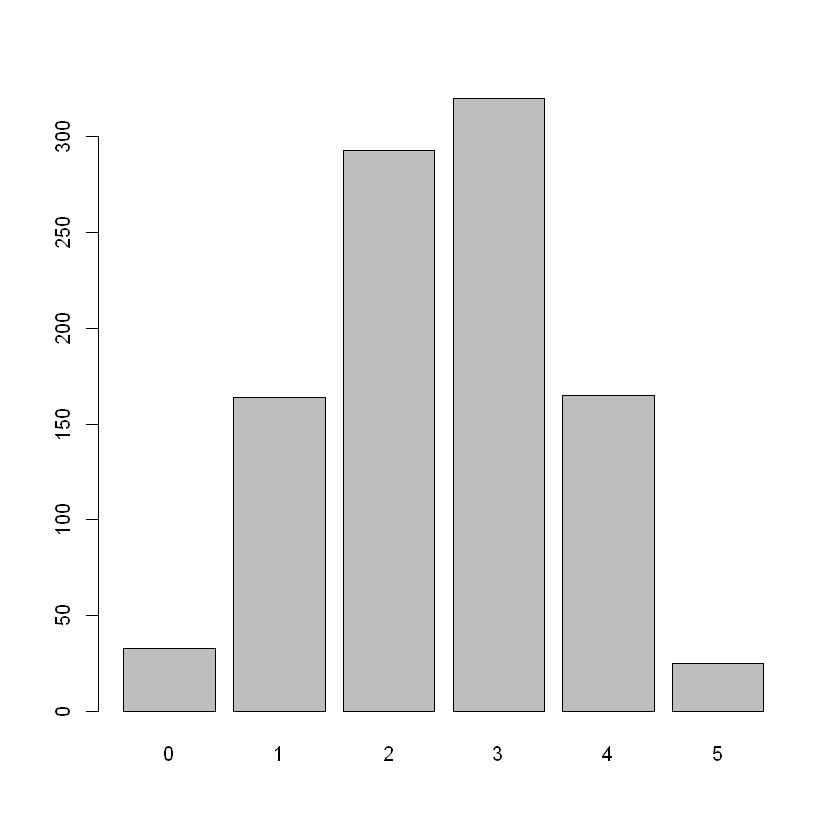

In [5]:
nsim = 1000
result = rep(0,nsim)
for(i in 1:nsim){
    outcome = sample(x=c(0,1), size = 5, replace=TRUE, prob=rep(0.5,2))
    result[i] = sum(outcome)
}
table(result)
barplot(table(result))

Alternative, we may simulate random numbers from the binomial distribution with $n=5$ and $p=0.5$.

result
  0   1   2   3   4   5 
 37 164 290 334 141  34 

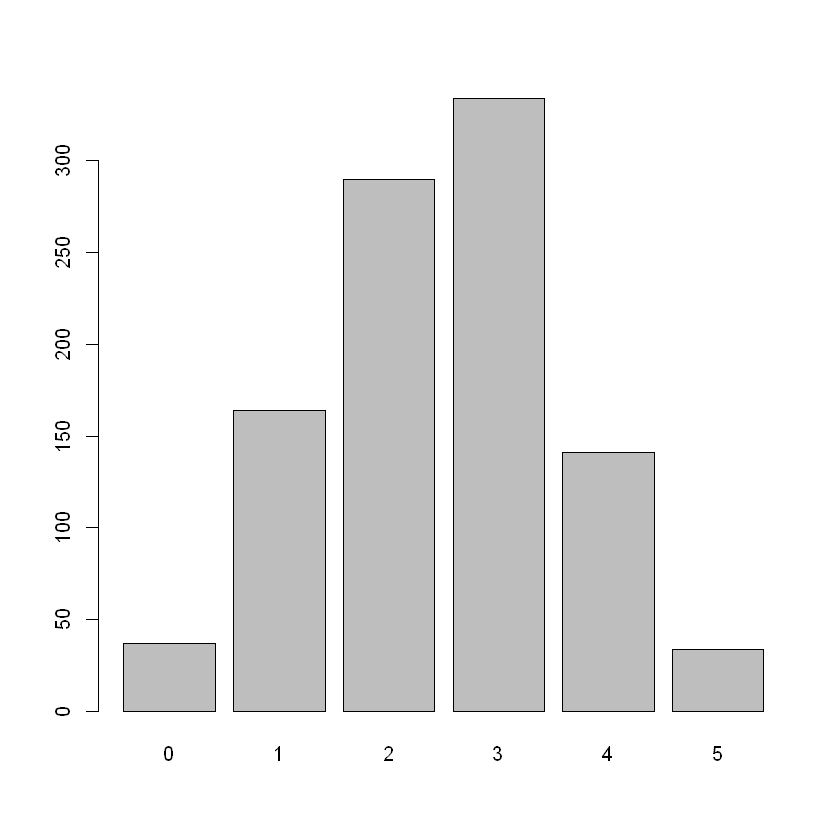

In [6]:
result = rbinom(1000,size=5,p=0.5)
table(result)
barplot(table(result))

```{admonition} Exercise 3
Given a DNA sequence AGCCCGGGTTTACCCTTGGGAAAATTGCCCCAGTGACCCCT, 
1. calculate the proportion of A, C, G, T.
2. Use R to randomly select a nucleotide from the DNA sequence
3. Now we want to select 10 nucleotides without replacement. Then calculate the sample proportions of A, C, G, T among the 10 selected nucleotides and compare them with the population proportions of A, C, G, T in the DNA sequence.
4. Let's select 100 nucleotides and calculate the sample proportions.
```

In [7]:
seq = "AGCCCGGGTTTACCCTTGGGAAAATTGCCCCAGTGACCCCT"
x = unlist(strsplit(seq,split=""))

#proportions of A, C, G, T
sum(x=='A')/length(x)
sum(x=='C')/length(x)
sum(x=='G')/length(x)
sum(x=='T')/length(x)

#select a nucleotide
position=sample(1:length(x),size=1)
x[position]

#sample 10 nucleotides without replacement
position = sample(1:length(x),size=10)
data = x[position]
data
print("the proportions of A, C, G, T in the sample of 10 nucleotides")
sum(data=='A')/10
sum(data=='C')/10
sum(data=='G')/10
sum(data=='T')/10

#sample 100 nucleotides with replacement
position = sample(1:length(x),size=100,replace=TRUE)
data = x[position]
print("the proportions of A, C, G, T in the sample of 100 nucleotides")
sum(data=='A')/100
sum(data=='C')/100
sum(data=='G')/100
sum(data=='T')/100

[1] 0.195122

[1] 0.3414634

[1] 0.2439024

[1] 0.2195122

[1] "G"

[1] "C" "C" "G" "G" "T" "C" "T" "A" "A" "G"

[1] "the proportions of A, C, G, T in the sample of 10 nucleotides"


[1] 0.2

[1] 0.3

[1] 0.3

[1] 0.2

[1] "the proportions of A, C, G, T in the sample of 100 nucleotides"


[1] 0.22

[1] 0.34

[1] 0.22

[1] 0.22

To generate a random number from the binomial distribution

In [8]:
rbinom(n=10, size=5, prob=0.5)

[1] 2 2 3 5 2 3 4 2 3 4

to generate a random number from the Poisson distribution

In [9]:
rpois(n=10, lambda=3.5)

[1] 8 5 8 9 5 7 0 6 8 2

## Continuous probability distributions

We may generate a random number from an interval [a, b] using the R function **runif()**. For example, we may generate a random number between 0 and 2,

In [10]:
runif(1, min=0, max=2)

[1] 0.5262096

Or generate 10 random numbers from the interval [2, 10]

In [11]:
runif(10, min=2, max=10)

[1] 3.967916 6.183408 4.058799 7.610464 8.701975 4.831228 4.517116 4.239835
 [9] 5.446734 7.039366

We may generate 10 random numbers from the normal distribution with mean = 4.5 and variance = 2 and then calculate the sample average.

In [12]:
data = rnorm(10, mean=4.5, sd=sqrt(2))
data
print(paste("the sample average:",mean(data)))

[1] 4.152060 4.513785 3.743880 3.341590 5.630344 6.013065 2.786864 4.098918
 [9] 4.537295 4.305399

[1] "the sample average: 4.3123199984931"


## Dealing with sequence files
The R function **scan()** can read text files into R. FASTA format: A sequence record in a FASTA format consists of a single-line description (sequence name), followed by line(s) of sequence data. The first character of the description line is a greater-than (">") symbol. To read FASTA file test.fasta, the R code is

In [13]:
x = scan("https://book.phylolab.net/binf8441/data/lab2_test.fasta", what="character",sep="\n")

Then, we count the number of sequences in the file. In addition, what is the length of those sequences. Also, calculate the proportion of A, C, G, T in each sequence.

In [14]:
#count the number of >
index = grep(">",x)
nseq = length(index)
print(paste("the number of sequences:",nseq))

#get sequences
seq=rep("",length(index))
for(i in 1:length(index)){
    if(i < length(index)){
        seq[i] = paste(x[(index[i]+1):(index[i+1]-1)],collapse="",sep="")
    }else{
        seq[i] = paste(x[(index[i]+1):length(x)],collapse="",sep="")
    }
}

#sequence length
seqlength = nchar(seq[1])
print(paste("the sequence length is",seqlength))

#proportions
prop = matrix(0,nrow=nseq,ncol=4)
row.names(prop) = paste("seq",1:nseq,sep="")
for(i in 1:nseq){
    s = unlist(strsplit(seq[i],split=""))
    prop[i,] = c(sum(s=='a'), sum(s=='c'), sum(s=='g'), sum(s=='t'))/seqlength
}
print("the proportions of a, c, g, t in each sequence")
prop

[1] "the number of sequences: 5"


[1] "the sequence length is 279"


[1] "the proportions of a, c, g, t in each sequence"


seq1,0.1792115,0.1648746,0.1505376,0.3225806
seq2,0.1505376,0.1505376,0.1433692,0.3010753
seq3,0.1720430,0.1648746,0.1541219,0.3261649
seq4,0.2329749,0.1075269,0.1648746,0.3225806
seq5,0.2258065,0.1039427,0.1648746,0.3333333
